## K-Nearest Neighbour(KNN) Machine Learning Algorithm

The K-Nearest Neighbors (KNN) algorithm is a simple, non-parametric, supervised machine learning algorithm that can be used for both classification and regression tasks. It's often referred to as a "lazy learner" because it doesn't build a model during a training phase; instead, all computation happens when a prediction is requested.


Common distance metrics used in machine learning, particularly in algorithms like K-Nearest Neighbors (KNN). These metrics quantify how "similar" or "dissimilar" two data points are. Let's break down Euclidean, Manhattan, and Minkowski distances.

Assume you have two data points, $A$ and $B$, in an $n$-dimensional space.
$A = (a_1, a_2, ..., a_n)$
$B = (b_1, b_2, ..., b_n)$

### 1. Euclidean Distance

The Euclidean distance is the most common and intuitive distance metric. It represents the shortest straight-line distance between two points in Euclidean space. Think of it as applying the Pythagorean theorem in multiple dimensions.

**Formula:**
$$D_{\text{Euclidean}}(A, B) = \sqrt{\sum_{i=1}^{n} (a_i - b_i)^2}$$

**Explanation:**
1.  For each dimension $i$, find the difference between the coordinates of $A$ and $B$: $(a_i - b_i)$.
2.  Square each of these differences: $(a_i - b_i)^2$.
3.  Sum up all the squared differences.
4.  Take the square root of the sum.

**Example (2D):**
Let $A = (1, 2)$ and $B = (4, 6)$
$D_{\text{Euclidean}}(A, B) = \sqrt{(1 - 4)^2 + (2 - 6)^2}$
$D_{\text{Euclidean}}(A, B) = \sqrt{(-3)^2 + (-4)^2}$
$D_{\text{Euclidean}}(A, B) = \sqrt{9 + 16}$
$D_{\text{Euclidean}}(A, B) = \sqrt{25}$
$D_{\text{Euclidean}}(A, B) = 5$

### 2. Manhattan Distance (L1 Norm / Taxicab Distance / City Block Distance)

The Manhattan distance measures the distance between two points by summing the absolute differences of their coordinates. It's called "Manhattan" distance because it's like navigating a grid of city blocks where you can only move horizontally or vertically, not diagonally.

**Formula:**
$$D_{\text{Manhattan}}(A, B) = \sum_{i=1}^{n} |a_i - b_i|$$

**Explanation:**
1.  For each dimension $i$, find the absolute difference between the coordinates of $A$ and $B$: $|a_i - b_i|$.
2.  Sum up all these absolute differences.

**Example (2D):**
Let $A = (1, 2)$ and $B = (4, 6)$
$D_{\text{Manhattan}}(A, B) = |1 - 4| + |2 - 6|$
$D_{\text{Manhattan}}(A, B) = |-3| + |-4|$
$D_{\text{Manhattan}}(A, B) = 3 + 4$
$D_{\text{Manhattan}}(A, B) = 7$

### 3. Minkowski Distance

The Minkowski distance is a generalization of both Euclidean and Manhattan distances. It introduces a parameter, $p$, which allows you to adjust the "norm" of the distance calculation.

**Formula:**
$$D_{\text{Minkowski}}(A, B, p) = \left(\sum_{i=1}^{n} |a_i - b_i|^p\right)^{\frac{1}{p}}$$

**Explanation:**
1.  For each dimension $i$, find the absolute difference between the coordinates: $|a_i - b_i|$.
2.  Raise each absolute difference to the power of $p$: $|a_i - b_i|^p$.
3.  Sum up all these results.
4.  Take the $p$-th root of the sum.

**Relationship to other distances:**
* When $p=1$, the Minkowski distance becomes the **Manhattan distance**:
    $$D_{\text{Minkowski}}(A, B, 1) = \left(\sum_{i=1}^{n} |a_i - b_i|^1\right)^{\frac{1}{1}} = \sum_{i=1}^{n} |a_i - b_i|$$
* When $p=2$, the Minkowski distance becomes the **Euclidean distance**:
    $$D_{\text{Minkowski}}(A, B, 2) = \left(\sum_{i=1}^{n} |a_i - b_i|^2\right)^{\frac{1}{2}} = \sqrt{\sum_{i=1}^{n} (a_i - b_i)^2}$$
* As $p \rightarrow \infty$, the Minkowski distance approaches the **Chebyshev distance** (also known as $L_{\infty}$ norm), which is the maximum absolute difference between any two corresponding coordinates:
    $$D_{\text{Chebyshev}}(A, B) = \max_{i} |a_i - b_i|$$

**Example (2D, with p=3):**
Let $A = (1, 2)$ and $B = (4, 6)$
$D_{\text{Minkowski}}(A, B, 3) = \left(|1 - 4|^3 + |2 - 6|^3\right)^{\frac{1}{3}}$
$D_{\text{Minkowski}}(A, B, 3) = \left(|-3|^3 + |-4|^3\right)^{\frac{1}{3}}$
$D_{\text{Minkowski}}(A, B, 3) = \left(3^3 + 4^3\right)^{\frac{1}{3}}$
$D_{\text{Minkowski}}(A, B, 3) = (27 + 64)^{\frac{1}{3}}$
$D_{\text{Minkowski}}(A, B, 3) = (91)^{\frac{1}{3}}$
$D_{\text{Minkowski}}(A, B, 3) \approx 4.4979$

When implementing KNN, you often use libraries like scikit-learn in Python, which provide these distance metrics readily. You don't usually need to code them from scratch, but understanding the underlying formulas is crucial for choosing the right metric for your specific problem.

##### Load Dataset (For classification prediction)

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
df=sns.load_dataset('iris')

In [127]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
41,4.5,2.3,1.3,0.3,setosa
99,5.7,2.8,4.1,1.3,versicolor
18,5.7,3.8,1.7,0.3,setosa


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [129]:
# slipt X an y
X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=df['species']

In [130]:
# load and fit KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=3)


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: xlabel='col_0', ylabel='species'>

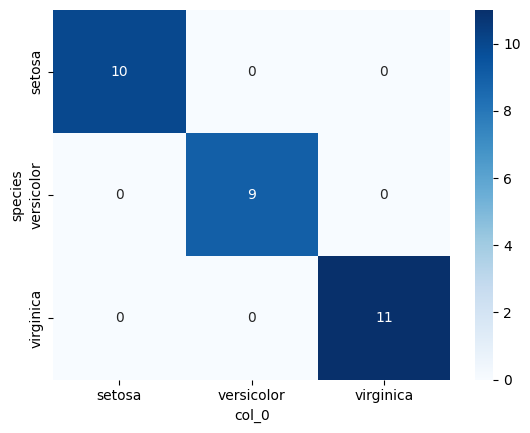

In [131]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model on the training data
knn.fit(X_train, y_train)
# Make predictions on the test data
predictions = knn.predict(X_test)
# Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
# Visualize the decision boundary
sns.heatmap(pd.crosstab(y_test, predictions), annot=True, fmt='d', cmap='Blues')

In [132]:
# predict the specis of new measurements
new_measurement = np.array([[5.0,2.2,4.0,1.0]])
predicted_species = knn.predict(new_measurement)
print(f"Predicted species for new measurement {new_measurement[0]}: {predicted_species[0]}")

Predicted species for new measurement [5.  2.2 4.  1. ]: versicolor


c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Data Load (For regression prediction)

In [143]:
df=sns.load_dataset('tips')

In [144]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [145]:
# split X and y
X=df[['total_bill','sex','size','day','time','smoker']]
y=df['tip']

In [146]:
# feature encoding(categorical to numerical) using loop and lebel encoder
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in X.select_dtypes(include=['category']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le
    

C:\Users\SIZAN\AppData\Local\Temp\ipykernel_18056\620956578.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
C:\Users\SIZAN\AppData\Local\Temp\ipykernel_18056\620956578.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
C:\Users\SIZAN\AppData\Local\Temp\ipykernel_18056\620956578.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [147]:
# traning and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
#  fitting the model
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=3,metric='minkowski',p=2)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [149]:
# Make predictions on the test data
predictions = knn_reg.predict(X_test)

In [150]:
predictions[:5]

array([2.72      , 1.45333333, 3.93333333, 4.15333333, 1.89666667])

In [151]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.0155619047619049
R^2 Score: 0.18753185134795147
